In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random as rd
rd.seed(0)

In [157]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/titanic.csv', index_col='PassengerId')

In [158]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
len(raw_data)

891

In [160]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [161]:
raw_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
raw_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Calculate the correlation coefficient between survived and pclass columns

In [163]:
cols = ["Survived","Pclass"]
train_corr = raw_data[cols].corr()
train_corr

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


Text(0.5, 1.0, 'Simple Heatmap')

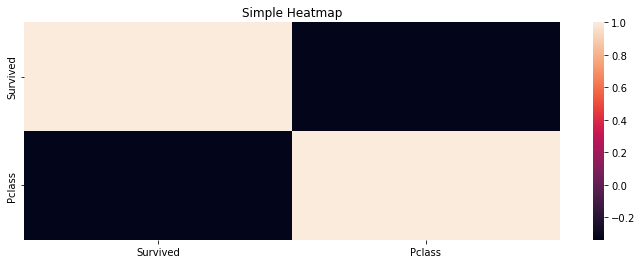

In [164]:
fig,ax = plt.subplots(figsize=(12,4))
sns.heatmap(train_corr)
ax.set_title('Simple Heatmap')

## Cleaning up the data

In [165]:
clean_data = raw_data.drop('Cabin',axis=1)

In [166]:
clean_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [167]:
median_age = clean_data['Age'].median()

In [168]:
clean_data['Age'] = clean_data['Age'].fillna(median_age)

In [216]:
clean_data['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    28.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [217]:
clean_data['Embarked'] = clean_data['Embarked'].fillna('U')

In [218]:
clean_data['Embarked']

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

## Saving our data for the future

In [219]:
clean_data.to_csv('./clean_titanic_data.csv', index=None)

In [220]:
clean_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Manipulating the features
- One-hot encoding
- Binning
- Feature selection

In [3]:
preprocessed_data = pd.read_csv('clean_titanic_data.csv')
preprocessed_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [4]:
gender_column = pd.get_dummies(preprocessed_data['Sex'],prefix='Sex')

In [5]:
embarked_column = pd.get_dummies(preprocessed_data['Embarked'],prefix='Pclass')

In [6]:
preprocessed_data = pd.concat([preprocessed_data , gender_column],axis = 1)

In [7]:
preprocessed_data = pd.concat([preprocessed_data , embarked_column],axis = 1)

In [8]:
preprocessed_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0


In [9]:
preprocessed_data = preprocessed_data.drop(['Sex', 'Embarked'], axis=1)

In [10]:
preprocessed_data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0


### does increasing the value of the feature make it more likely (or less likely) for a passenger to survive?
- Answer: Yes

In [11]:
class_survived = preprocessed_data[['Pclass', 'Survived']]

In [12]:
first_class = class_survived[class_survived['Pclass'] == 1]
second_class = class_survived[class_survived['Pclass'] == 2]
third_class = class_survived[class_survived['Pclass'] == 3]

In [13]:
first_class['Survived'].mean()*100

62.96296296296296

In [14]:
second_class['Survived'].mean()*100

47.28260869565217

In [15]:
third_class['Survived'].mean()*100

24.236252545824847

In [16]:
pclass_columns = pd.get_dummies( preprocessed_data['Pclass'],prefix='Pclass')

In [17]:
preprocessed_data = pd.concat([preprocessed_data,pclass_columns],axis=1)

In [18]:
preprocessed_data = preprocessed_data.drop('Pclass',axis=1)

In [19]:
preprocessed_data.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U,Pclass_1,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,0,1


## Binning

In [20]:
preprocessed_data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(preprocessed_data['Age'], bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(["Age"], axis=1)


In [22]:
preprocessed_data.head()

,Survived,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U,Pclass_1,Pclass_2,Pclass_3,Categorized_age
0,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,0,1,"(20, 30]"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,1,0,0,0,1,0,0,"(30, 40]"
2,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,0,1,"(20, 30]"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,0,0,1,0,1,0,0,"(30, 40]"
4,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,1,0,0,1,0,0,0,1,"(30, 40]"


In [23]:
cagegorized_age_columns = pd.get_dummies(preprocessed_data['Categorized_age'], prefix='Categorized_age')
preprocessed_data = pd.concat([preprocessed_data, cagegorized_age_columns], axis=1)
preprocessed_data = preprocessed_data.drop(['Categorized_age'], axis=1)

In [24]:
preprocessed_data.head()

,Survived,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


## Feature Selection

In [25]:
preprocessed_data = preprocessed_data.drop(['Name', 'Ticket'],axis=1)

In [26]:
preprocessed_data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


##  Saving for future use

In [27]:
preprocessed_data.to_csv('preprocessed_titanic_data.csv', index=None)

In [28]:
data = pd.read_csv('preprocessed_titanic_data.csv')

In [29]:
data.head()

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Features-labels split and train-validation split

In [30]:
X = data.drop(['Survived'],axis=1)
y =data['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [33]:
X_validation, X_test, y_validation,y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=101)

In [34]:
print(len(X_train))
print(len(X_validation))
print(len(X_test))
print(len(y_train))
print(len(y_validation))
print(len(y_test))

534
178
179
534
178
179


## Training several models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [36]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [39]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)

AdaBoostClassifier()

## Evaluating the models

### Accuracy

In [59]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


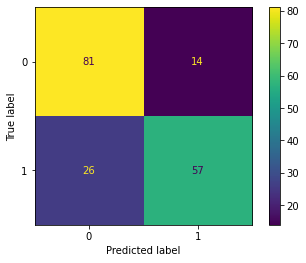

In [56]:
plot_confusion_matrix(lr_model,X_validation, y_validation)

In [58]:
print("Scores of the models: ")
print("Logistic regression:", lr_model.score(X_validation, y_validation))
print("Decision Tree:", dt_model.score(X_validation, y_validation))
print("Naive Bayes:", nb_model.score(X_validation, y_validation))
print("Random Forest:", rf_model.score(X_validation, y_validation))
print("SVM :", svm_model.score(X_validation, y_validation))
print("Gradient boosting :", gb_model.score(X_validation, y_validation))
print("AdaBoost :", ab_model.score(X_validation, y_validation))

Scores of the models: 
Logistic regression: 0.7752808988764045
Decision Tree: 0.7415730337078652
Naive Bayes: 0.7471910112359551
Random Forest: 0.7696629213483146
SVM : 0.5786516853932584
Gradient boosting : 0.8033707865168539
AdaBoost : 0.7415730337078652


In [62]:
print("F1-scores of the models:")

lr_predicted_labels = lr_model.predict(X_validation)
print("Logistic regression:", f1_score(y_validation, lr_predicted_labels))

dt_predicted_labels = dt_model.predict(X_validation)
print("Decision Tree:", f1_score(y_validation, dt_predicted_labels))

nb_predicted_labels = nb_model.predict(X_validation)
print("Naive Bayes:", f1_score(y_validation, nb_predicted_labels))

svm_predicted_labels = svm_model.predict(X_validation)
print("Support Vector Machine:", f1_score(y_validation, svm_predicted_labels))

rf_predicted_labels = rf_model.predict(X_validation)
print("Random Forest:", f1_score(y_validation, rf_predicted_labels))

gb_predicted_labels = gb_model.predict(X_validation)
print("Gradient boosting:", f1_score(y_validation, gb_predicted_labels))

ab_predicted_labels = ab_model.predict(X_validation)
print("AdaBoost:", f1_score(y_validation, ab_predicted_labels))


F1-scores of the models:
Logistic regression: 0.7402597402597403
Decision Tree: 0.7012987012987013
Naive Bayes: 0.736842105263158
Support Vector Machine: 0.3119266055045872
Random Forest: 0.7388535031847134
Gradient boosting: 0.7712418300653594
AdaBoost: 0.6973684210526315


## Testing the model

In [65]:
# Accuracy of the test data
print("Gradient boosting:", gb_model.score(X_test, y_test))

Gradient boosting: 0.8435754189944135


In [69]:
# F1_score of the test data
gb_predicted_test_labels = gb_model.predict(X_test)
f1_score(y_test, gb_predicted_test_labels)

0.7666666666666666

## Grid search

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
print("SVM grid search with a radial basis function kernel")

SVM grid search with a radial basis function kernel


In [83]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']})

In [85]:
svm_winner = svm_gs.best_estimator_

In [86]:
svm_winner.score(X_validation , y_validation)

0.7640449438202247

## Cross validation

In [87]:
svm_gs.cv_results_

{'mean_fit_time': array([0.00964885, 0.0062407 , 0.00901618, 0.00851393, 0.00968552,
        0.00669465, 0.00753441, 0.008148  , 0.01080961, 0.01499624,
        0.00300126, 0.00899544, 0.00901923, 0.00303903, 0.        ,
        0.00651155, 0.00963473, 0.00973115, 0.01574335, 0.01414552,
        0.01129622, 0.01412635, 0.00623565, 0.01284184, 0.00802441]),
 'std_fit_time': array([3.95423452e-03, 7.64380550e-03, 7.36177224e-03, 5.31304814e-03,
        3.25252200e-03, 3.35429599e-03, 9.05240534e-04, 2.75509660e-04,
        6.10124043e-03, 6.86115484e-06, 6.00252151e-03, 7.34474528e-03,
        7.36425962e-03, 6.07805252e-03, 0.00000000e+00, 7.98573540e-03,
        5.78741906e-03, 5.96510784e-03, 8.04599088e-05, 3.07305362e-03,
        4.02853473e-03, 3.08254089e-03, 7.63711155e-03, 3.93951200e-03,
        6.15266664e-05]),
 'mean_score_time': array([0.00204654, 0.        , 0.00299578, 0.00648251, 0.00483179,
        0.00320244, 0.00329175, 0.0032063 , 0.0023684 , 0.        ,
        0.00